Import des packages et initialisation des variables

In [1]:
import numpy as np
import math as mt
from scipy import stats
from scipy.special import binom
import matplotlib.pyplot as plt
from statistics import mean, variance

k = 6; #nb school
rep = 100; #nb simulations
n = 60; #etudiants
place = n//k; #nb place par école
custom = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 14, 14];
#[2, 7, 9, 11, 14, 17]; #nb de place par école, mais non constante

Construction des préférences aléatoires des acteurs

In [2]:
def init(distribution):
    school = [];
    student = [];
    if(distribution == "constant"):
        for i in range(k):
            temp = np.arange(n);
            np.random.shuffle(temp);
            temp = temp.tolist();
            for j in range(place):
                school.append(temp.copy());
        for i in range(n):
            temp = np.arange(k);
            np.random.shuffle(temp);
            temp2 = [];
            for p in temp:
                temp2 += np.arange(p*place, p*place+place).tolist();
            student.append(temp2);
    if(distribution == "custom"):
        fplace = [0];
        for p in custom[0:k-1]:
            fplace.append(fplace[-1]+p);
        for i in range(k):
            temp = np.arange(n);
            np.random.shuffle(temp);
            temp = temp.tolist();
            for j in range(custom[i]):
                school.append(temp.copy());
        for i in range(n):
            temp = np.arange(k);
            np.random.shuffle(temp);
            temp2 = [];
            for p in temp:
                temp2 += np.arange(fplace[p], fplace[p]+custom[p]).tolist();
            student.append(temp2);
    return(student, school);

def match(man_l, woman_l, option, woman):
    man_list = man_l.copy();
    woman_list = woman_l.copy();
    waitinglist = [];
    student_partner = [-1]*n;
    liste_partner = [];
    for man in range(n):
        choix = man_list[man].pop(0);
        if(choix == woman):
            liste_partner.append(man);
        if(student_partner[choix] < 0):
            student_partner[choix] = man;
        else:
            rank1 = woman_list[choix].index(man);
            rank2 = woman_list[choix].index(student_partner[choix]);
            if(rank2 < rank1):
                waitinglist += [man];
            else:
                waitinglist += [student_partner[choix]];
                student_partner[choix] = man;
    while(len(waitinglist) > 0):
        w = waitinglist.copy();
        waitinglist.clear();
        for man in w:
            choix = man_list[man].pop(0);
            if(choix == woman):
                liste_partner.append(man);
            if(student_partner[choix] < 0):
                student_partner[choix] = man;
            else:
                rank1 = woman_list[choix].index(man);
                rank2 = woman_list[choix].index(student_partner[choix]);
                if(rank2 < rank1):
                    waitinglist += [man];
                else:
                    waitinglist += [student_partner[choix]];
                    student_partner[choix] = man;
    if(option == 0):
        return(student_partner);
    if(option == 1):
        return(liste_partner);

def cheating(man_l, woman_l, woman_position, exhausted):
    st = [];
    for f in woman_l:
        st.append(f.copy());
    sc = [];
    for f in man_l:
        sc.append(f.copy());
    partner = match(sc, st, 1, woman_position);
    exbis = partner + exhausted;
    for p in partner:
        if(not(p in exhausted)):
            exhausted.append(p);
            st[woman_position] = woman_l[woman_position].copy();
            st[woman_position].remove(p);
            st[woman_position] = [p] + st[woman_position];
            temp = cheating(man_l, st, woman_position, exbis);
            for t in temp:
                if(not(t in exhausted) and not(t in partner)):
                    exhausted.append(t);
    return exhausted;

In [14]:
count = 0;
l = [];

for r in range(rep):
    if(r%20 == 0):
        print(r);
    nb_profitable = 0;
    student, school = init("constant");
    for i in range(n):
        sc = [];
        for f in school:
            sc.append(f.copy());
        st = [];
        for f in student:
            st.append(f.copy());
        true_partner = match(sc, st, 0, i)[i];
        N = set(cheating(school, student, i, []));
        for c in N:
            if((student[i].index(c)) < student[i].index(true_partner)):
                nb_profitable += 1;
                break;
    l.append(nb_profitable);
    if(nb_profitable > 0):
        count += 1;
print(count/rep);
l.sort();
print(l);

0
20
40
60
80
0.57
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 20, 20, 20, 21, 21, 22, 26]


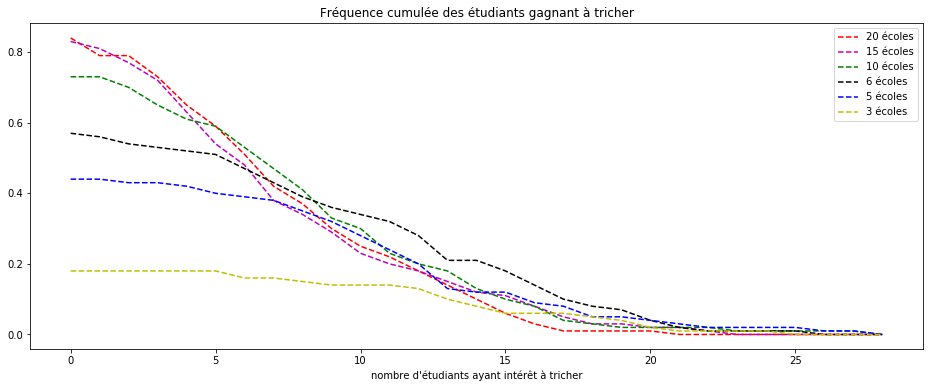

4.35
9.216666666666667
11.516666666666667
11.95
11.7
11.683333333333334


In [2]:
#cas sans inversion école, étudiant
nb_simu = 100;

#100 simulations, 5 écoles, 60 étudiants
affiche5 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 5, 5, 6, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 16, 16, 16, 17, 18, 18, 18, 20, 21, 22, 26, 28];
#100 simulations, 20 ecoles, 60 étudiants
affiche20 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 21];
#100 simulations, 10 ecoles, 60 étudiants
affiche10 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 17, 18, 19, 23, 28];
#100 simulations, 3 ecoles, 60 étudiants
affiche3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 8, 9, 12, 13, 13, 13, 14, 14, 15, 15, 18, 19, 20, 20, 21, 25];
#100 simulations, 6 ecoles, 60 etudiants
affiche6 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 20, 20, 20, 21, 21, 22, 26];
#100 simulations, 15 ecoles, 60 etudiants
affiche15 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 16, 16, 16, 17, 17, 17, 18, 18, 20, 22, 23];

affiche = affiche20
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
fig = plt.figure( figsize=(16, 6) );
plt.plot(sortie, 'r--', label = '20 écoles');

affiche = affiche15
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'm--', label = '15 écoles');

affiche = affiche10
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'g--', label = '10 écoles');

affiche = affiche6
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'k--', label = '6 écoles');

affiche = affiche5
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'b--', label = '5 écoles');

affiche = affiche3
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'y--', label = '3 écoles');

plt.title("Fréquence cumulée des étudiants gagnant à tricher");
plt.xlabel("nombre d'étudiants ayant intérêt à tricher");
plt.legend();
plt.show();

fig.savefig("normal");

print(mean(affiche3)*100/60)
print(mean(affiche5)*100/60)
print(mean(affiche6)*100/60)
print(mean(affiche10)*100/60)
print(mean(affiche15)*100/60)
print(mean(affiche20)*100/60)

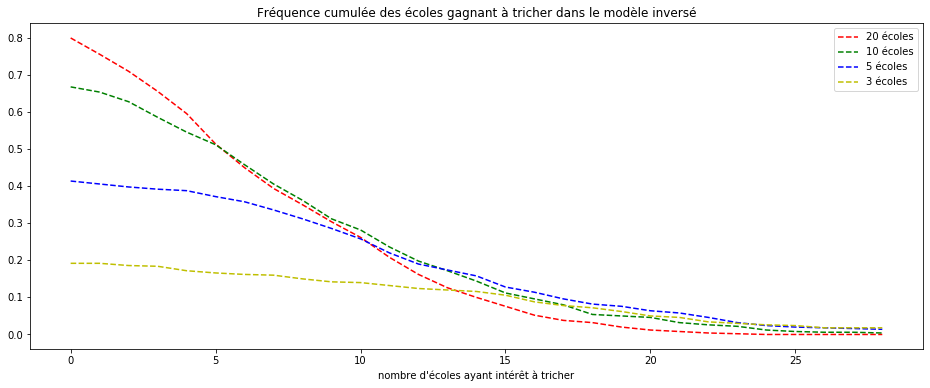

4.35
9.216666666666667
11.95
11.683333333333334


In [4]:
#cas avec inversion école, étudiant

nb_simu = 500;
#500 simulations, 5 écoles, 60 étudiants
affiche5i = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 17, 17, 18, 18, 18, 20, 21, 22, 23, 23, 27, 29, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 6, 6, 6, 6, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 20, 20, 20, 20, 20, 21, 22, 23, 23, 24, 24, 25, 28, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 5, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 19, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 25, 26, 30, 31, 31, 36]
#500 simulations, 20 ecoles, 60 étudiants
affiche20i = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 15, 16, 17, 17, 18, 18, 19, 19, 20, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 19, 19, 19, 20, 20, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 19, 20, 21, 21, 22]
#500 simulations, 10 ecoles, 60 étudiants
affiche10i = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 20, 21, 21, 21, 21, 22, 23, 25, 25, 26, 29, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 18, 18, 18, 18, 18, 18, 18, 20, 21, 21, 21, 22, 22, 23, 24, 24, 24, 24, 24, 28]
#500 simulations, 3 ecoles, 60 étudiants
affiche3i = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 8, 9, 10, 11, 12, 13, 15, 16, 16, 17, 17, 18, 19, 20, 20, 23, 29, 31, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 8, 8, 9, 11, 12, 12, 16, 19, 20, 21, 22, 22, 22, 23, 25, 26, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, 22, 22, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 4, 5, 5, 7, 8, 8, 9, 9, 11, 11, 12, 13, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 18, 19, 19, 20, 22, 24, 26, 26, 31, 31, 32, 34, 38]

affiche = affiche20i
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);
sortie = np.array(sortie)/nb_simu;
fig = plt.figure( figsize=(16, 6) );
plt.plot(sortie, 'r--', label = '20 écoles');

affiche = affiche10i
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'g--', label = '10 écoles');

affiche = affiche5i
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'b--', label = '5 écoles');

affiche = affiche3i
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 30):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'y--', label = '3 écoles');

plt.title("Fréquence cumulée des écoles gagnant à tricher dans le modèle inversé");
plt.xlabel("nombre d'écoles ayant intérêt à tricher")
plt.legend();
plt.show();

fig.savefig("inverse");

print(mean(affiche3)*100/60)
print(mean(affiche5)*100/60)
print(mean(affiche10)*100/60)
print(mean(affiche20)*100/60)

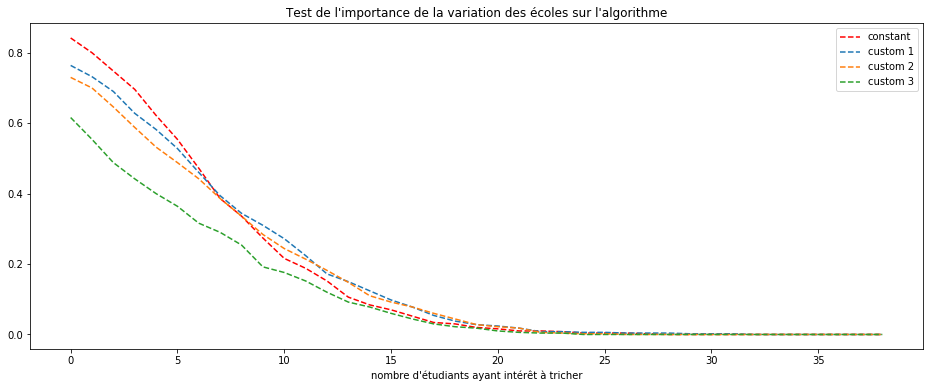

In [3]:
nb_simu = 500;

reference = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19, 19, 20, 20, 21, 21, 23, 24, 24, 27, 28];
#custom 1, 500 simulations, [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6]
affiche20_c1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 16, 17, 17, 17, 18, 18, 19, 21, 21, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 21, 22, 22, 22, 22, 22, 24, 26, 29];
#custom, 500 simulations, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7]
affiche20_c2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 22, 22, 22, 23, 24, 26];
#custom, 500 simulations, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 14, 14]
affiche20_c3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 20, 20, 20, 20, 21, 21, 24, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 11, 11, 12, 12, 13, 13, 13, 15, 15, 15, 18, 19, 22]

affiche_liste = [affiche20_c1, affiche20_c2, affiche20_c3];

fig = plt.figure( figsize=(16, 6) );

affiche = reference;
affiche.sort()
taille = len(affiche)
sortie = [];
for i in range(1, 40):
    pos = 0;
    while((pos < taille) and (affiche[pos] < i)):
        pos += 1;
    
    sortie.append(taille-pos);

sortie = np.array(sortie)/nb_simu;
plt.plot(sortie, 'r--', label = 'constant');

for j in range(3):
    affiche = affiche_liste[j];
    affiche.sort();
    taille = len(affiche);
    sortie = [];
    for i in range(1, 40):
        pos = 0;
        while((pos < taille) and (affiche[pos] < i)):
            pos += 1;
        sortie.append(taille-pos);
    sortie = np.array(sortie)/nb_simu;
    plt.plot(sortie, '--', label = 'custom ' + str(j+1));

plt.title("Test de l'importance de la variation des écoles sur l'algorithme")
plt.xlabel("nombre d'étudiants ayant intérêt à tricher")
plt.legend();
plt.show();
fig.savefig("Test");